<a href="https://colab.research.google.com/github/gtimokhina/homework_1_directory/blob/master/TensorFlow_keras_basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

### regular imports

In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import dataset  CIFAR-10 *(Canadian dataset, consists of 60000 32x32 images of 10 classes: https://en.wikipedia.org/wiki/CIFAR-10)*

In [0]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Explore our data

In [41]:
train_images.shape

(50000, 32, 32, 3)

In [42]:
len(train_labels)

50000

In [43]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [44]:
test_images.shape

(10000, 32, 32, 3)

In [45]:
len(test_labels)

10000

## Preprocess our data

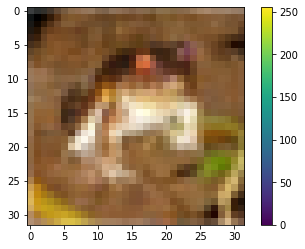

In [46]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### scale to range 0-1

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### verify data

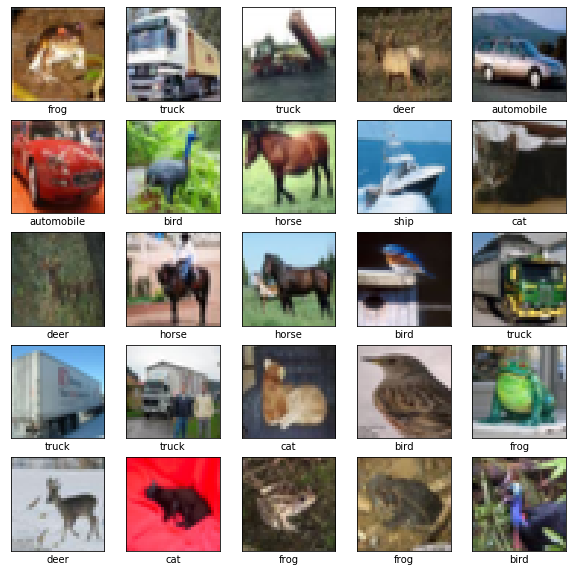

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

## Build the model

####   set up the layers

In [0]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

####  compile model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

####  feed the model

In [55]:
model.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 122us/sample - loss: 1.8981 - accuracy: 0.3193
Epoch 2/10
50000/50000 [==============================] - 4s 83us/sample - loss: 1.7459 - accuracy: 0.3764
Epoch 3/10
50000/50000 [==============================] - 4s 84us/sample - loss: 1.6945 - accuracy: 0.3937
Epoch 4/10
50000/50000 [==============================] - 4s 82us/sample - loss: 1.6592 - accuracy: 0.4097
Epoch 5/10
50000/50000 [==============================] - 4s 82us/sample - loss: 1.6365 - accuracy: 0.4182
Epoch 6/10
50000/50000 [==============================] - 4s 84us/sample - loss: 1.6162 - accuracy: 0.4257
Epoch 7/10
50000/50000 [==============================] - 4s 84us/sample - loss: 1.6033 - accuracy: 0.4302
Epoch 8/10
50000/50000 [==============================] - 4s 82us/sample - loss: 1.5865 - accuracy: 0.4354
Epoch 9/10
50000/50000 [==============================] - 4s 84us/sample - loss: 1.5760 - accuracy: 0.4408
Epoch 10/10
5

### evaluate 

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.6411 - accuracy: 0.4159

Test accuracy: 0.4159


## Make predictions

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

#### test the 4th image

In [64]:
predictions[3]

array([0.32238862, 0.22728069, 0.06952444, 0.04019484, 0.02667006,
       0.02045778, 0.00391745, 0.03625182, 0.17214349, 0.08117083],
      dtype=float32)

In [65]:
np.argmax(predictions[3])

0

In [66]:
test_labels[3]

array([0], dtype=uint8)

## Plot results

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')

#### check few images. *Correct prediction labels are blue and incorrect prediction labels are red.*


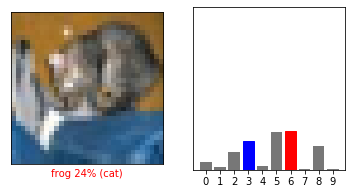

In [72]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

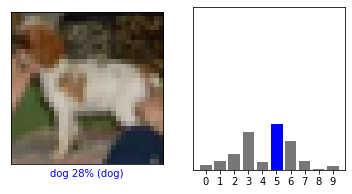

In [73]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#### check more images

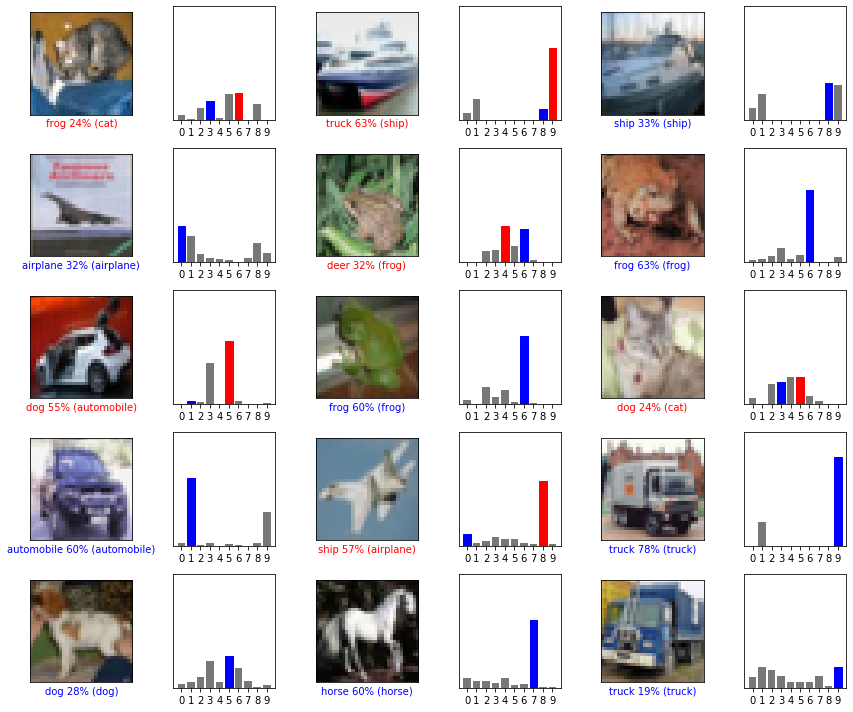

In [74]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model to make a prediction

In [85]:
img = test_images[10]

print(img.shape)

(32, 32, 3)


In [86]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [87]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.1030177  0.02178329 0.04615601 0.08086178 0.05890365 0.06133397
  0.02902142 0.01481058 0.5710978  0.0130138 ]]


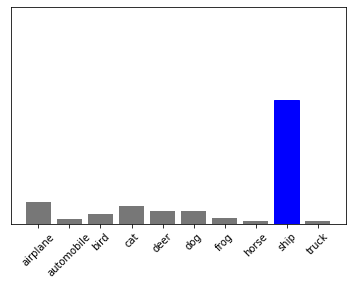

In [88]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [89]:
np.argmax(predictions_single[0])

8